Código adaptado do repositório https://github.com/d2l-ai/d2l-en
Neste repositório tem uma implementação do MultiLayer Perceptrons(MLP)

Imports do pytorch e do d2l


In [2]:
import torch 
from torch import nn
from d2l import torch as d2l

Inicializa Parametros do Modelo

In [3]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

Implementa o Modelo e a Função de Ativação Relu

In [4]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [5]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2


Treinamento do modelo

Versão original

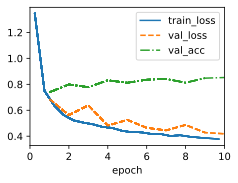

In [6]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

Primeira versão modificada

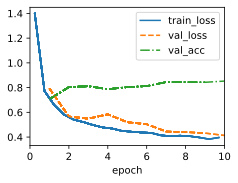

In [7]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=128, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

Segunda versão modificada

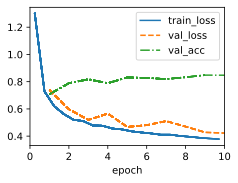

In [8]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=360, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

Terceira versão modificada

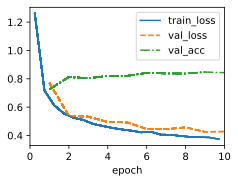

In [9]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=512, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [10]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

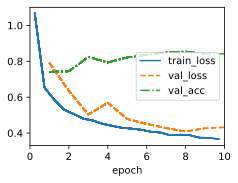

In [11]:
        
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

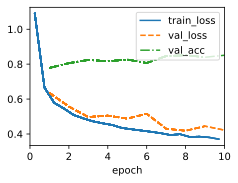

In [12]:
        
model = MLP(num_outputs=10, num_hiddens=128, lr=0.1)
trainer.fit(model, data)

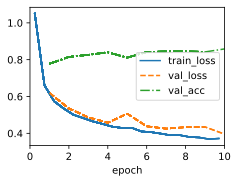

In [13]:
        
model = MLP(num_outputs=10, num_hiddens=360, lr=0.1)
trainer.fit(model, data)

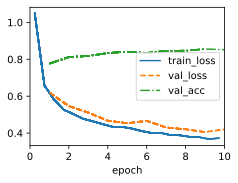

In [14]:
        
model = MLP(num_outputs=10, num_hiddens=512, lr=0.1)
trainer.fit(model, data)

Resultados
O modelo com os diferentes num_hiddens ficaram bem parecidos os resutlatdo para acuracia, perda e taxa de treino. O modelo com num_hiddens = 512 foi o que teve melhor desempenho, porém foi bem pouca a diferença.


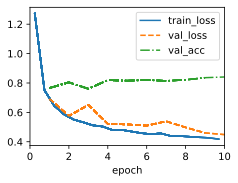

In [15]:
model = MLP(num_outputs=10, num_hiddens=512, lr=0.05)
trainer.fit(model, data)

Resultado

Ao mudar o lr de 0.1 para 0.05 o que modou no grafico foi a perda, mas isso aconteceu no inicio da epoca 2 para a 4.